<a href="https://colab.research.google.com/github/ziatdinovmax/pyroVED/blob/main/examples/jrVAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning (jointly) discrete and continuous representations of the arbitrary rotated image data


---

Here we introduce a joint (rotationally-invariant) VAE that can perform unsupervised classification and disentangle relevant continuous factors of variation at the same time.


---





Prepared by Maxim Ziatdinov

E-mail: ziatdinovmax@gmail.com

In [1]:
#@title Installation
!pip install -q pyroved kornia

In [ ]:
#@title Imports
from typing import Tuple

import pyroved as pv
import torch
import kornia as K
from torchvision import datasets
import matplotlib.pyplot as plt

In [3]:
#@title Helper functions
def rotate_images(imgdata, rotation_range: Tuple[int]) -> Tuple[torch.Tensor]:
    torch.manual_seed(0)
    theta = torch.randint(*rotation_range, size=(len(imgdata),))
    imgdata = K.rotate(imgdata.float()[:, None], theta.float())
    imgdata = imgdata / imgdata.max()
    return imgdata, theta


def get_mnist_data(rotation_range: Tuple[int]) -> Tuple[torch.Tensor]:
    !wget -qq www.di.ens.fr/~lelarge/MNIST.tar.gz
    !tar -zxf MNIST.tar.gz
    mnist_trainset = datasets.MNIST(
        root='.', train=True, download=False, transform=None)
    images_r, theta = rotate_images(mnist_trainset.data, rotation_range)
    return images_r, mnist_trainset.targets, theta

Get training data and create a dataloader object:

In [4]:
train_data, train_labels, angles = get_mnist_data(rotation_range=[-60, 61])
train_loader = pv.utils.init_dataloader(train_data, batch_size=64)

/usr/local/lib/python3.7/dist-packages/kornia/geometry/transform/imgwarp.py:184: UserWarning: The align_corners default value has been changed. By default now is set True in order to match cv2.warpAffine. In case you want to keep your previous behaviour set it to False. This warning will disappear in kornia > v0.6.
  warnings.warn(message)


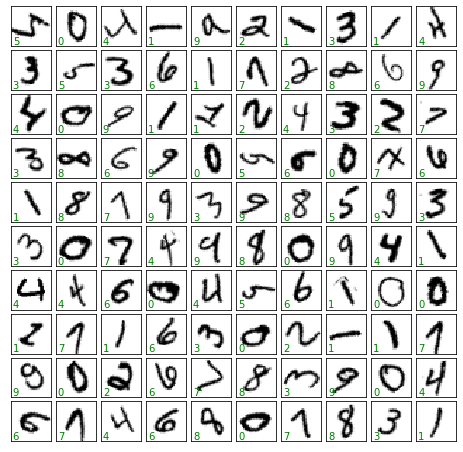

In [5]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for ax, im, lbl in zip(axes.flat, train_data, train_labels):
    ax.imshow(im.squeeze(), cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(lbl.item()),
            transform=ax.transAxes, color='green')

During training, we want our VAE model both assign the discrete class to the variables and find the optimal continuous latent code, i.e. perform classification and disentangle relevant variables at the same time. However, the problem with discrete (categorical) latent variables is that they cannot be backpropagated through samples. One common solution is to substitute a non-differentiable sample from a categorical distribution with a differentiable sample from a Gumbel-Softmax distribution. Another solution, which we are going to adapt here, is to marginalize out discrete latent variables via a full enumeration. This approach is generally associated with high computational costs but the recently available probabilistic programming libraries such as Pyro make this task easier by enabling parallel enumeration.

Initialize and train joint VAE model with rotational invariance:

Epoch: 1 Training loss: 230.1005
Epoch: 2 Training loss: 215.6208
Epoch: 3 Training loss: 213.9408
Epoch: 4 Training loss: 213.2227
Epoch: 5 Training loss: 212.8987
Epoch: 6 Training loss: 212.5225
Epoch: 7 Training loss: 212.0072
Epoch: 8 Training loss: 211.6778
Epoch: 9 Training loss: 211.3811
Epoch: 10 Training loss: 211.2603


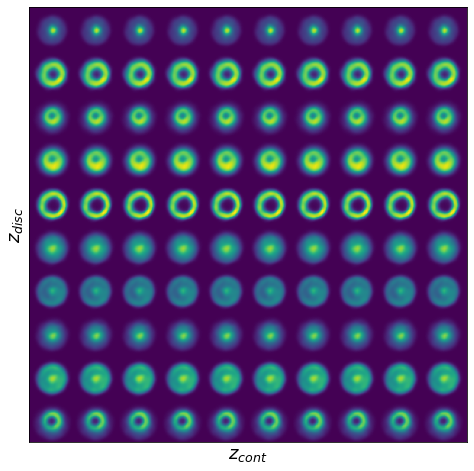

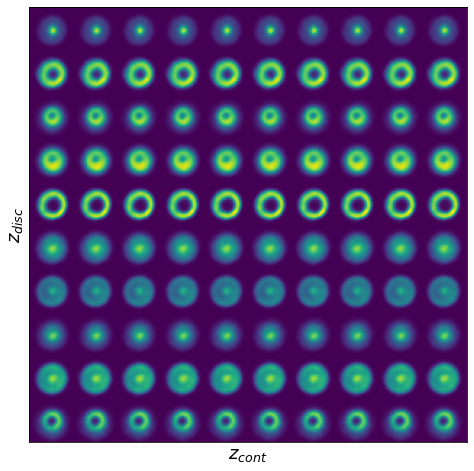

Epoch: 11 Training loss: 211.1659
Epoch: 12 Training loss: 211.0532
Epoch: 13 Training loss: 211.0251
Epoch: 14 Training loss: 210.9296
Epoch: 15 Training loss: 210.8749
Epoch: 16 Training loss: 210.8424
Epoch: 17 Training loss: 210.8308
Epoch: 18 Training loss: 210.7983
Epoch: 19 Training loss: 210.6994
Epoch: 20 Training loss: 210.7022


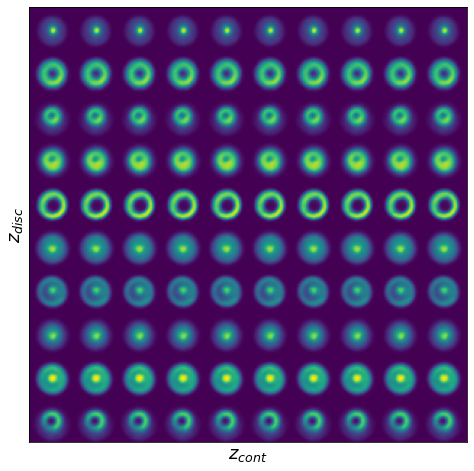

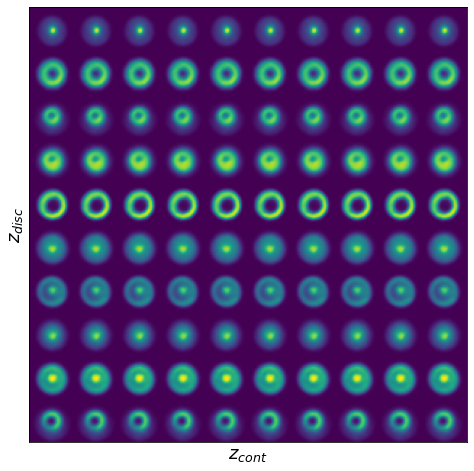

Epoch: 21 Training loss: 210.6791
Epoch: 22 Training loss: 210.6575
Epoch: 23 Training loss: 210.6279
Epoch: 24 Training loss: 210.5340
Epoch: 25 Training loss: 210.5040
Epoch: 26 Training loss: 210.4564
Epoch: 27 Training loss: 210.3806
Epoch: 28 Training loss: 210.3104
Epoch: 29 Training loss: 210.2460
Epoch: 30 Training loss: 210.0959


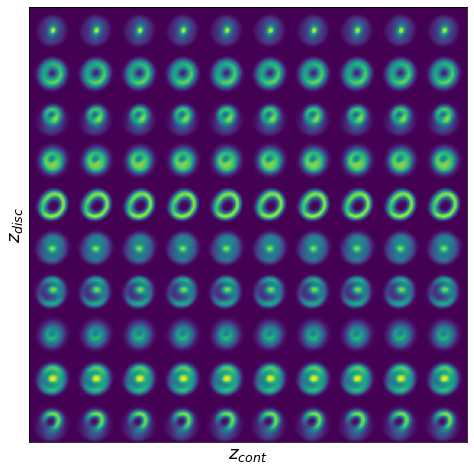

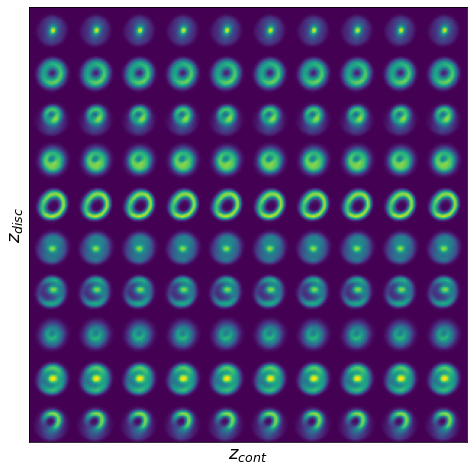

Epoch: 31 Training loss: 209.0656
Epoch: 32 Training loss: 205.6848
Epoch: 33 Training loss: 203.6226
Epoch: 34 Training loss: 202.2129
Epoch: 35 Training loss: 200.9137
Epoch: 36 Training loss: 199.4767
Epoch: 37 Training loss: 198.0690
Epoch: 38 Training loss: 196.7297
Epoch: 39 Training loss: 195.3486
Epoch: 40 Training loss: 193.9680


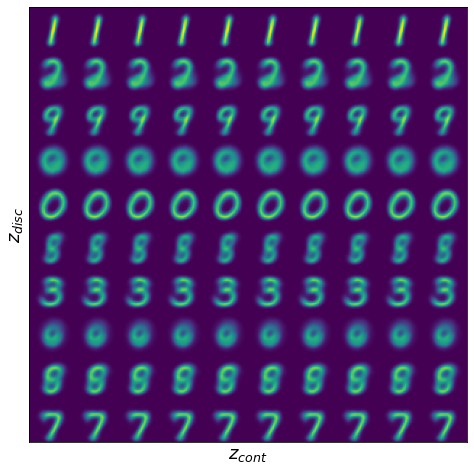

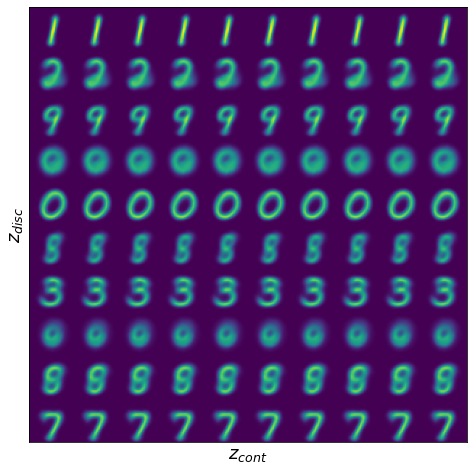

Epoch: 41 Training loss: 192.4571
Epoch: 42 Training loss: 190.7923
Epoch: 43 Training loss: 188.9931
Epoch: 44 Training loss: 186.8597
Epoch: 45 Training loss: 184.8775
Epoch: 46 Training loss: 182.7621
Epoch: 47 Training loss: 180.7116
Epoch: 48 Training loss: 178.5414
Epoch: 49 Training loss: 176.2563
Epoch: 50 Training loss: 173.7313


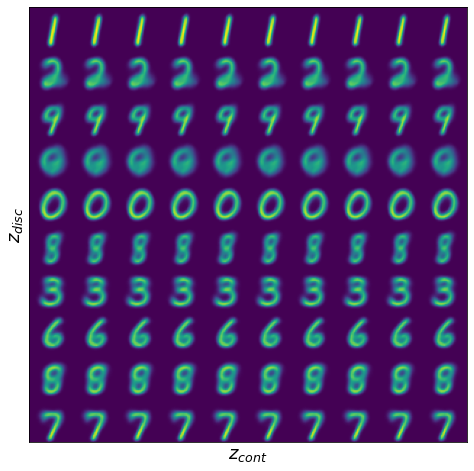

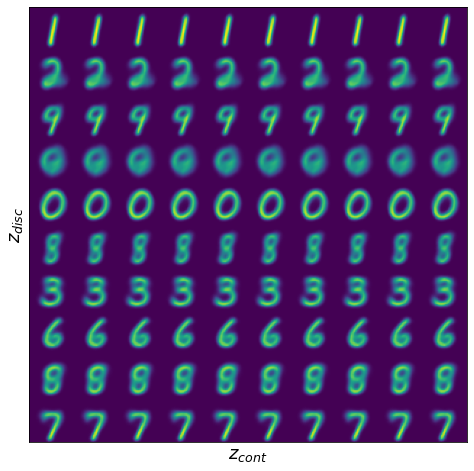

Epoch: 51 Training loss: 171.9190
Epoch: 52 Training loss: 169.2044
Epoch: 53 Training loss: 168.1215
Epoch: 54 Training loss: 167.3770
Epoch: 55 Training loss: 166.8734
Epoch: 56 Training loss: 166.5893
Epoch: 57 Training loss: 166.2429
Epoch: 58 Training loss: 166.0039
Epoch: 59 Training loss: 165.8481
Epoch: 60 Training loss: 165.6029


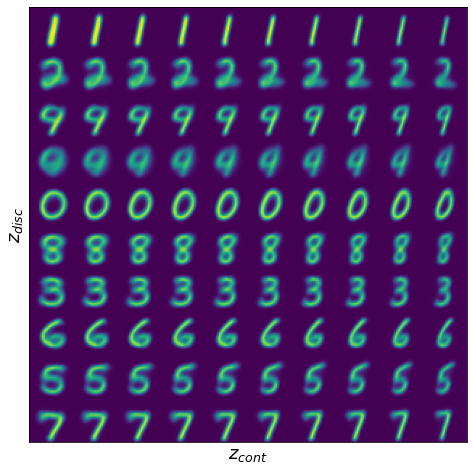

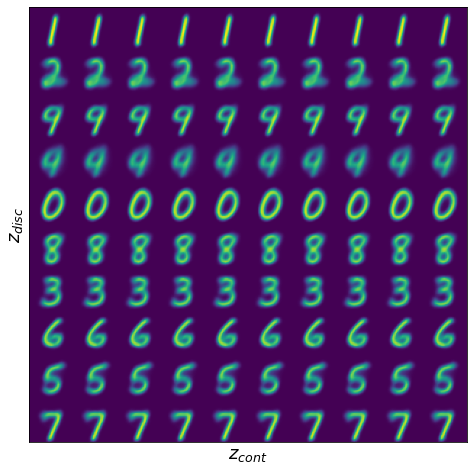

Epoch: 61 Training loss: 165.5444
Epoch: 62 Training loss: 165.3146
Epoch: 63 Training loss: 165.0788
Epoch: 64 Training loss: 163.9525
Epoch: 65 Training loss: 163.3375
Epoch: 66 Training loss: 162.9671
Epoch: 67 Training loss: 162.7445
Epoch: 68 Training loss: 162.4977
Epoch: 69 Training loss: 162.4191
Epoch: 70 Training loss: 162.2017


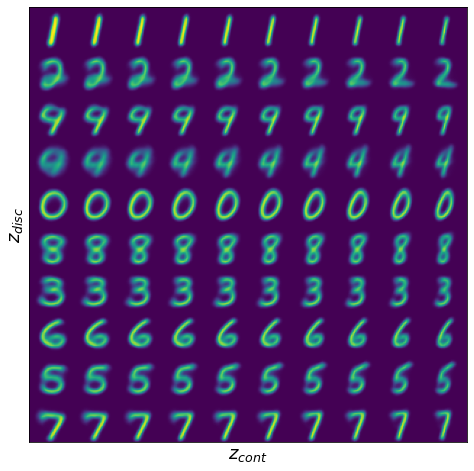

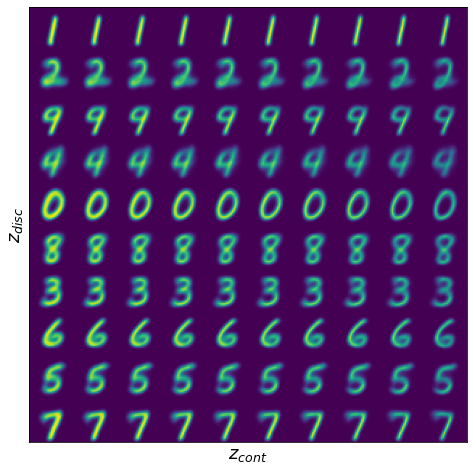

Epoch: 71 Training loss: 162.0467
Epoch: 72 Training loss: 161.9000
Epoch: 73 Training loss: 161.8256
Epoch: 74 Training loss: 161.6660
Epoch: 75 Training loss: 161.5161
Epoch: 76 Training loss: 161.5173
Epoch: 77 Training loss: 161.3881
Epoch: 78 Training loss: 161.3035
Epoch: 79 Training loss: 161.1937
Epoch: 80 Training loss: 161.1519


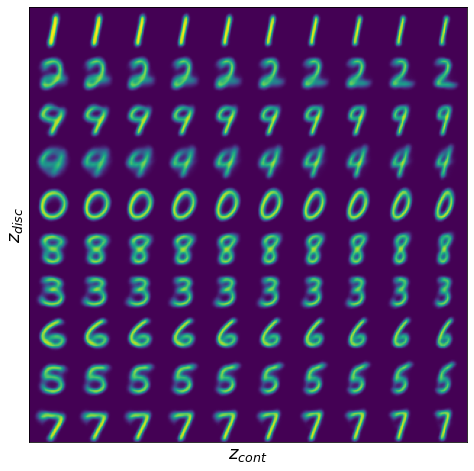

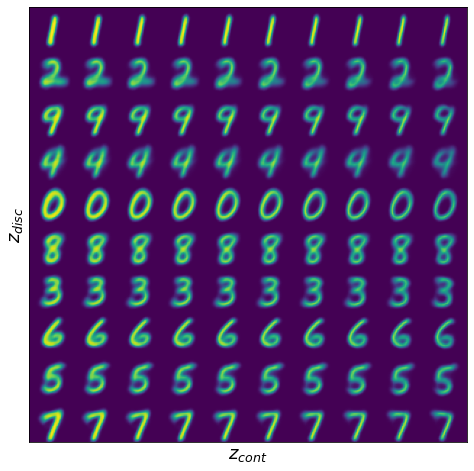

Epoch: 81 Training loss: 161.0945
Epoch: 82 Training loss: 160.9941
Epoch: 83 Training loss: 160.9155
Epoch: 84 Training loss: 160.8605
Epoch: 85 Training loss: 160.8223
Epoch: 86 Training loss: 160.7422
Epoch: 87 Training loss: 160.6752
Epoch: 88 Training loss: 160.6089
Epoch: 89 Training loss: 160.5743
Epoch: 90 Training loss: 160.4600


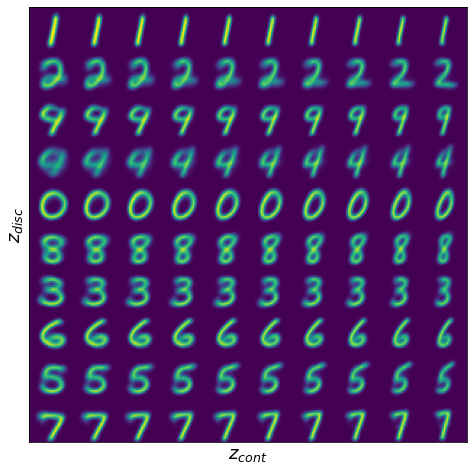

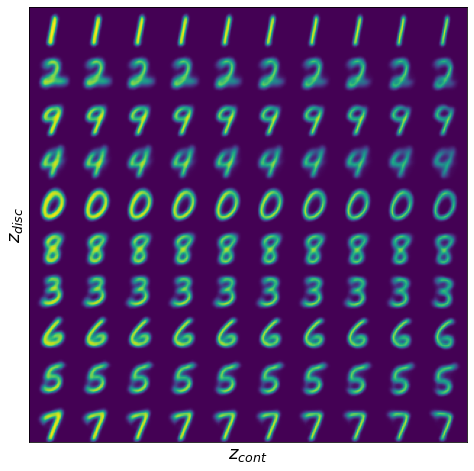

Epoch: 91 Training loss: 160.4714
Epoch: 92 Training loss: 160.4569
Epoch: 93 Training loss: 160.3480
Epoch: 94 Training loss: 160.2611
Epoch: 95 Training loss: 160.3174
Epoch: 96 Training loss: 160.2484
Epoch: 97 Training loss: 160.1902
Epoch: 98 Training loss: 160.1273
Epoch: 99 Training loss: 160.1704
Epoch: 100 Training loss: 160.0639


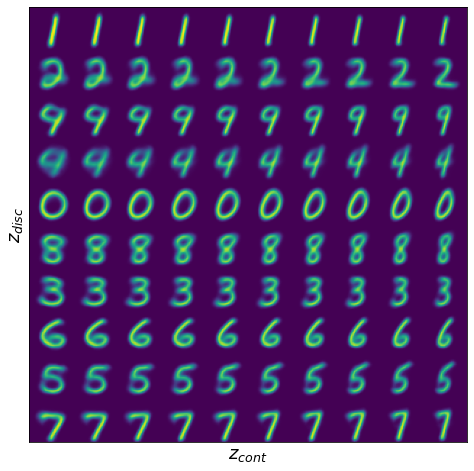

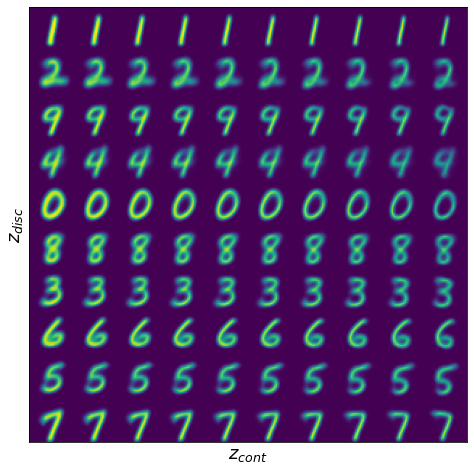

Epoch: 101 Training loss: 160.0245
Epoch: 102 Training loss: 160.0291
Epoch: 103 Training loss: 160.0280
Epoch: 104 Training loss: 159.9378
Epoch: 105 Training loss: 159.9557
Epoch: 106 Training loss: 159.9278
Epoch: 107 Training loss: 159.8152
Epoch: 108 Training loss: 159.7812
Epoch: 109 Training loss: 159.8485
Epoch: 110 Training loss: 159.7844


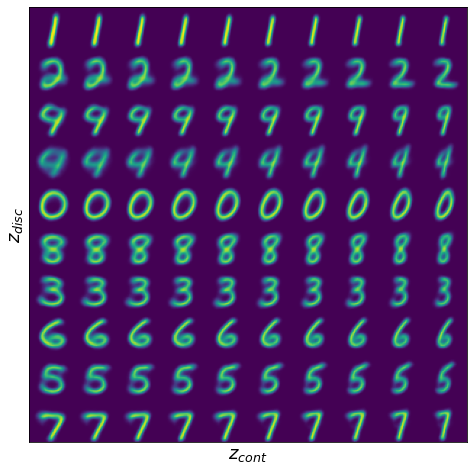

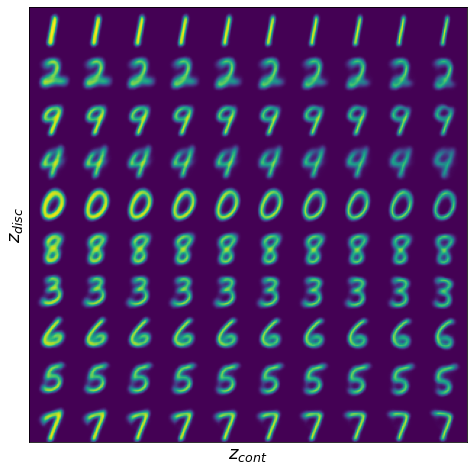

Epoch: 111 Training loss: 159.7010
Epoch: 112 Training loss: 159.7383
Epoch: 113 Training loss: 159.6584
Epoch: 114 Training loss: 159.6232
Epoch: 115 Training loss: 159.6173
Epoch: 116 Training loss: 159.6269
Epoch: 117 Training loss: 159.5749
Epoch: 118 Training loss: 159.5234
Epoch: 119 Training loss: 159.5938
Epoch: 120 Training loss: 159.5235


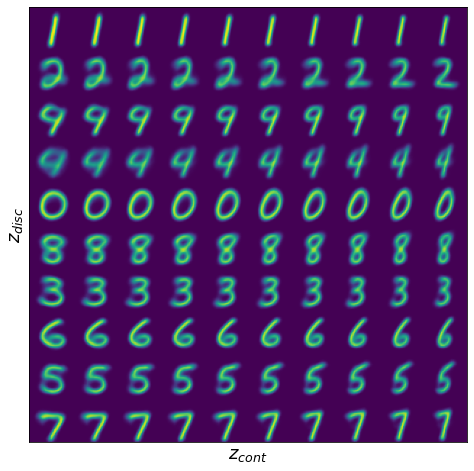

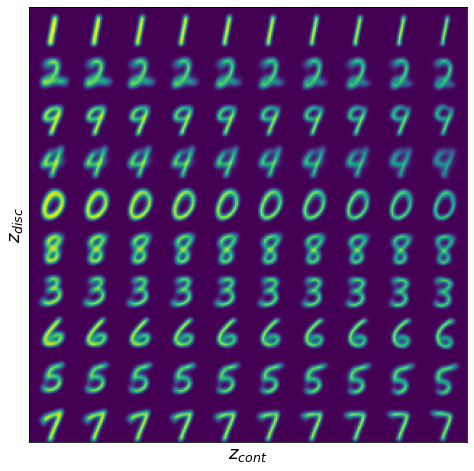

In [6]:
# Input data dimensions
data_dim = (28, 28)

# Initialize joint VAE model (note that we have to enter our "guess" about the number of discrete classes in the system)
jvae = pv.models.jiVAE(data_dim, latent_dim=2, discrete_dim=10, invariances=['r'], seed=42)

# Initialize trainer (note that we are going to use parallel enumeration instead of Gumbel-Softmax approx)
trainer = pv.trainers.SVItrainer(jvae, lr=1e-3, enumerate_parallel=True)

# Use "time"-dependent KL scale factor for continuous latent variables
kl_scale = torch.cat(  
    [torch.ones(10,) * 40,  # put pressure on the continuous latent channel at the beginning
     torch.linspace(40, 3, 40)]  # gradually release the pressure
)  

# Train the model
for e in range(120):
    sc = kl_scale[e] if e < len(kl_scale) else kl_scale[-1]
    trainer.step(train_loader, scale_factor=[sc, 3])  # [continuous, discrete] KL scale factors
    trainer.print_statistics()
    # Plot the traversal of the latent manifold learned so far
    if (e + 1) % 10 == 0:
        for i in range(2):
            jvae.manifold_traversal(10, i, cmap='viridis');

Visualize the learned latent manifold:

(note that classes are learned in an unsupervised manner and their order dpeneds on the (pseudo-)random initialization of model parameters)

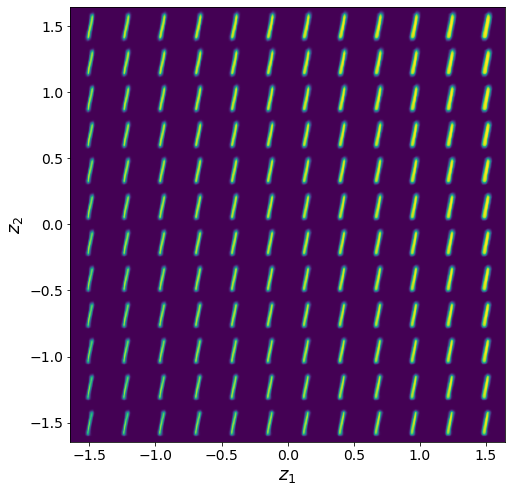

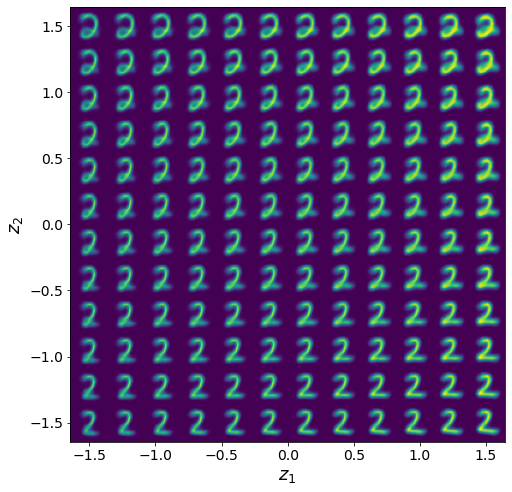

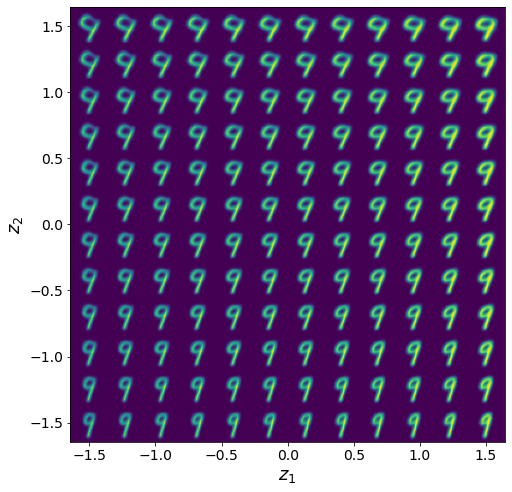

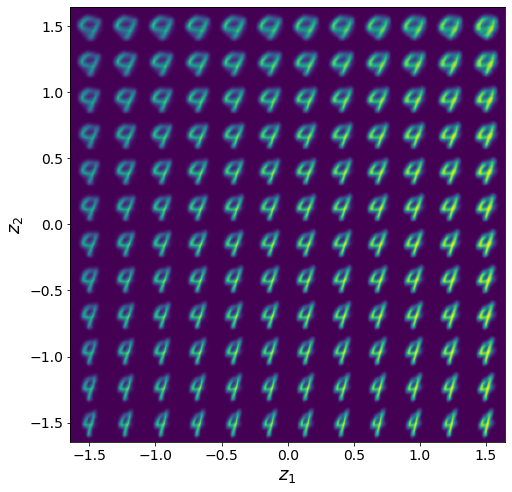

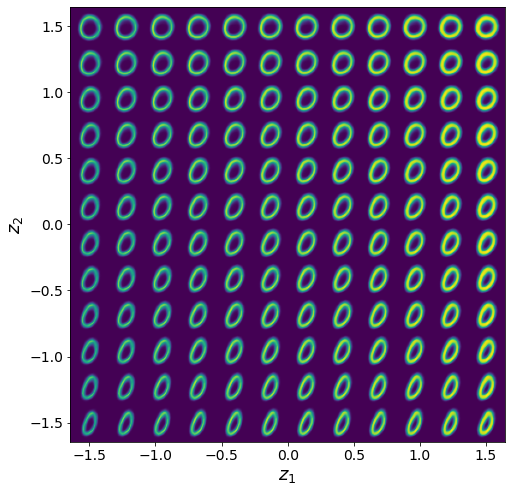

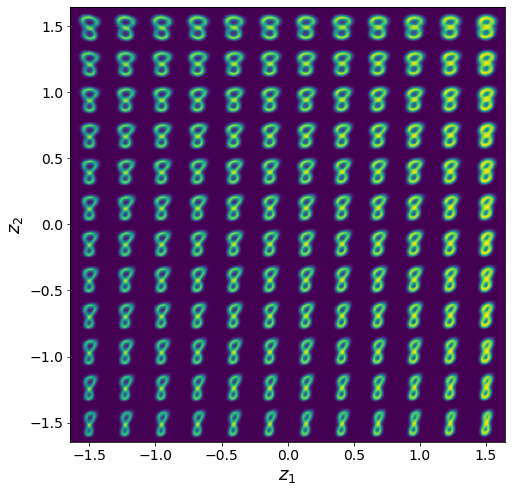

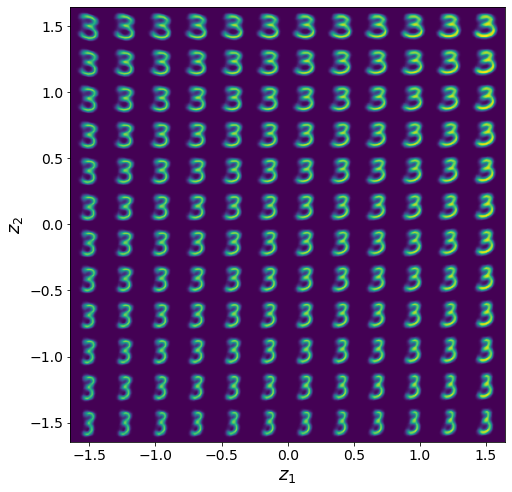

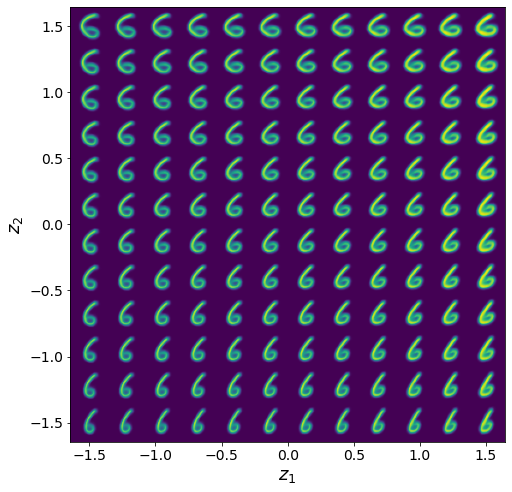

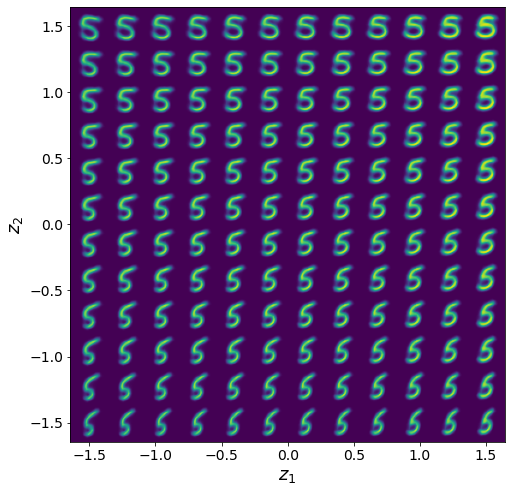

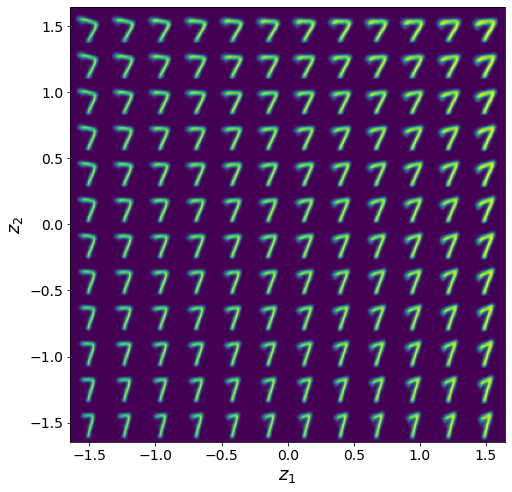

In [7]:
for i in range(10):
    jvae.manifold2d(d=12, disc_idx=i, cmap='viridis');

We can see that overall, our model did quite a remarkable job separating different classes without any supervision, as well as finding relevant factors of variation within each class.